# Challenges in Machine Learning
- Bad Data
- Bad Algorithm

# Bad Data

## Insufficient Quality Data
It takes a lot of data for ML algorithms to work properly <br>
<img src="images/importance_of_data.png" style="height:300px;"> <br>
Source: https://dl.acm.org/doi/10.3115/1073012.1073017

As the author puts it,
> these results suggest that we may want to reconsider the trade-off between spending time and money on algorithm development versus spending it on corpus development

## Nonrepresentative Training Data

### We lied
```py
df = df[(df['GDP'] > 25000) & (df['GDP'] < 60000)]
```

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

happiness_df = pd.read_csv(path + "/2017.csv")

path = kagglehub.dataset_download("nitishabharathi/gdp-per-capita-all-countries")

gdp_df = pd.read_csv(path + "/GDP.csv")

happiness_df = happiness_df[['Country', 'Happiness.Score']]
gdp_df = gdp_df[['Country ', '2017']]


gdp_df = gdp_df.rename(columns={'Country ': 'Country', '2017': 'GDP'})
combined_df = pd.merge(
    happiness_df,
    gdp_df,
    on='Country',  # Same column name after renaming
    how='inner'
)
df = combined_df.dropna()

/home/roundspecs/Developer/learning_ml/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_old = df[(df['GDP'] > 25000) & (df['GDP'] < 60000)]

<Axes: xlabel='GDP', ylabel='Happiness.Score'>

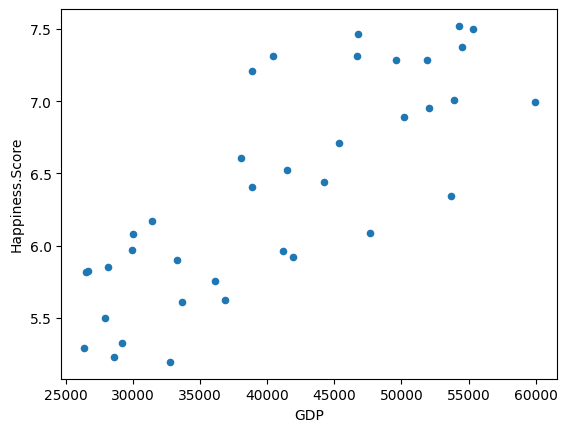

In [4]:
df_old[['Happiness.Score', 'GDP']].plot.scatter(
  x='GDP', y='Happiness.Score'
)

<Axes: xlabel='GDP', ylabel='Happiness.Score'>

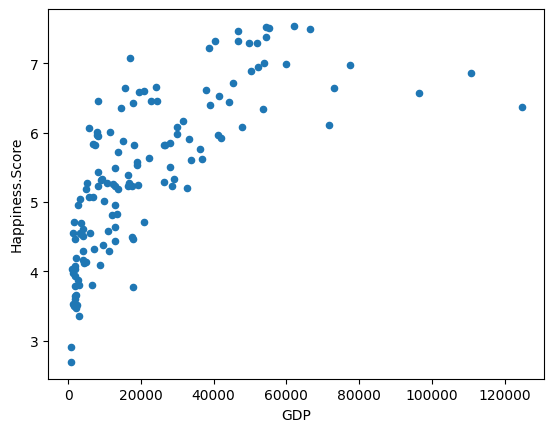

In [2]:
df[['Happiness.Score', 'GDP']].plot.scatter(
  x='GDP', y='Happiness.Score'
)

## Poor-Quality Data
- Errors, outliers and noise
- Data scientists actually spend a significat amount of time cleaning up the dataset

## Irrelevant Features
Garbage in, garbage out

| GDP Per Capita | Most used color for socks | Happiness Score |
|----------------|---------------------------|-----------------|
| 25000          | Black                     | 5.5             |
| 33000          | Red                       | 6.7             |
| ...            | ...                       | ...             |

Techniques:
- Feature selection
- Feature extraction
- New feature

# Bad Algorithm

## Underfitting
The model is too simple to learn from the data

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[["GDP"]].values
y = df["Happiness.Score"].values

model = LinearRegression()

model.fit(X, y)

LinearRegression()

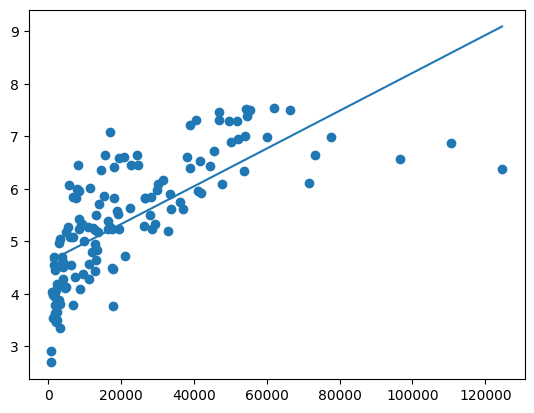

In [10]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.scatter(X, y)  # Scatter plot of actual data
plt.plot(X_range, y_pred)  # Regression line
plt.show()

## Overfitting
The model fits **too 'well'**<br>
![Overfitting](images/overfitting.png)

### How to sovle *overfitting*?
Overfitting occurs when the model is *too complex*. So, we have to make it simple <br>
One way to do this, is by constraining the model - this is called ***regularization***

### Example of *regularization*
$happiness\_score = \theta_0 + \theta_1 \times GDP\_per\_capita$

This model has 2 degrees of freedom (i.e. 2 parameters to tweak)

<iframe src="https://www.desmos.com/calculator/cjedinhvzj?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>

![regularization](images/regularization.png)

### Hyperparameters
- The parameters that decide ***how constrained** the model should be.
- It is a parameter of the ***learning algorithm*** (not of the model) <br>
  It is set prior to training and remains constant during training
- If hyperparams are too large: Flat model
- If hyperparams are too small: Overfitting

Example in Chapter 2